### Regression

Based on the Pearson Correlation and some prior visualizations, we can determine that the data is non-linear therefore Linear Regression is not an option for our data. Therefore we use XXX regression that is found inbuilt in the statsmodels library in Python

About the regression model: XXX

In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [3]:
#importing our df
df = pd.read_csv("combined_financial_data.csv", index_col=0)
df.head()

,date,permno,ticker,price,volume,return,high,low,open,ticker_attention,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,3.25,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,3.38,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,4.03,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,4.94,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,5.33,1.68


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame containing the data

# Drop rows with missing values
df_cleaned = df.dropna(subset=['attention', 'Adj Close', 'Volume', 'Volatility'])

# Model 1: Only 'attention' as independent variable
model1 = sm.OLS(df_cleaned['Adj Close'], sm.add_constant(df_cleaned['attention']))
result1 = model1.fit()
print(result1.summary())

# Model 2: 'attention', 'Volume', and 'Volatility' as independent variables
model2 = sm.OLS(df_cleaned['Adj Close'], sm.add_constant(df_cleaned[['attention', 'Volume', 'Volatility']]))
result2 = model2.fit()
print(result2.summary())

# Model 3: 'Volume' and 'Volatility' as independent variables
model3 = sm.OLS(df_cleaned['Adj Close'], sm.add_constant(df_cleaned[['Volume', 'Volatility']]))
result3 = model3.fit()
print(result3.summary())


In these models:

* Model 1 tests the impact of 'attention' on 'Adj Close'.
* Model 2 tests the impact of 'attention', 'Volume', and 'Volatility' on 'Adj Close'.
* Model 3 tests the impact of 'Volume' and 'Volatility' on 'Adj Close'.

The summary() function provides detailed statistics about the regression model, including coefficients, standard errors, t-values, p-values, and R-squared values, which you can use to interpret the results of the regression analysis. Adjust the column names and DataFrame name according to your actual data.

### 1 Polynomial Regression

In [9]:
import statsmodels.api as sm

# Assuming df, response_column, and training_columns are already defined
df2 = df.copy
X = sm.add_constant(df2['name_price_attention'])  # Include constant term
y = df2['return']

# Fit polynomial regression model (e.g., quadratic)
poly_degree = 2  # Quadratic
poly_features = sm.add_polynomial_features(X['name_price_attention'], degree=poly_degree, include_bias=False)
poly_model = sm.OLS(y, poly_features).fit()

# Print summary
print(poly_model.summary())


TypeError: 'method' object is not subscriptable

### 2. Generalized Additive Models (GAM):


In [12]:
import statsmodels.api as sm

# Assuming df, response_column, and training_columns are already defined

X = sm.add_constant(df[training_columns])  # Include constant term
y = df[response_column]

# Fit GAM model
gam_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Print summary
print(gam_model.summary())


NameError: name 'training_columns' is not defined

### 3. Nonlinear Least Squares (NLS): (Using LOWESS as an example)


In [ ]:
import statsmodels.api as sm

# Assuming df, response_column, and training_columns are already defined

X = df[training_columns]
y = df[response_column]

# Fit LOWESS model
lowess_model = sm.nonparametric.smoothers_lowess.lowess(y, X)

# Print summary or visualize the results as needed


### 4. Generalized Linear Models (GLM):

In [ ]:
import statsmodels.api as sm

# Assuming df, response_column, and training_columns are already defined

X = sm.add_constant(df[training_columns])  # Include constant term
y = df[response_column]

# Fit GLM model (e.g., with a gamma distribution and log link function)
glm_model = sm.GLM(y, X, family=sm.families.Gamma()).fit()

# Print summary
print(glm_model.summary())


### Medium trying to determine using shape 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
medium_trial = df[['date', 'return']]

medium_trial.head()

,date,return
0,2014-01-02,-0.006683
1,2014-01-03,-0.006728
2,2014-01-06,-0.021133
3,2014-01-07,0.007750
4,2014-01-08,-0.017852


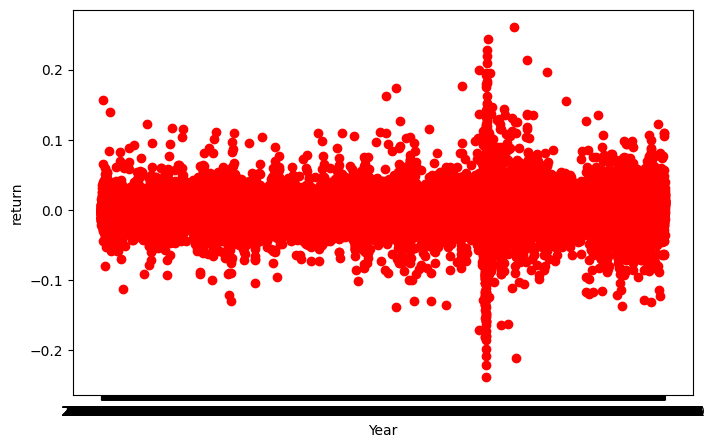

In [17]:
plt.figure(figsize=(8,5))
x_data, y_data = (medium_trial["date"].values, medium_trial["return"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('return')
plt.xlabel('Year')
plt.show()

alex tesxz